# **What are LLM Agents?**

LLM Agents are advanced AI systems powered by LLMs like ChatGPT. They are designed to not only generate responses but also:
- Perform specific tasks.
- Use tools like search engines or databases.
- Collaborate with other agents to solve complex problems.

### **Think of LLM Agents As:**
- **Smart Assistants**: They can handle tasks like summarizing reports or drafting recommendations.
- **Team Players**: Multiple agents can work together, with each specializing in a different aspect of the task.

# **Why Are LLM Agents Important?**

### **1. Enhanced Efficiency**
LLM agents can automate time-consuming tasks such as:
- Summarizing large reports.
- Drafting technical documents.
- Extracting insights from complex data.

### **2. Improved Decision-Making**
By analyzing data and generating insights, they assist professionals in making better decisions faster.

### **3. Innovation**
Agents open up possibilities for tasks like:
- Visualize and find insights from a report.
- Predictive maintenance.
- Automating compliance checks.


# **Components of LLM Agents**

An LLM agent typically consists of the following components:

### **1. LLM (The Brain)**
- The core model that understands and generates text based on input.

### **2. Memory**
- Allows the agent to remember past interactions or store important information for context.

### **3. Tools**
- Plugins or external systems the agent can use to:
  - Fetch real-time data (e.g., from the web).
  - Perform calculations.
  - Generate visualizations or documents.

### **4. Task Orchestrator**
- Coordinates tasks in multi-agent systems, enabling collaboration between agents.

Together, these components enable LLM agents to handle complex workflows efficiently.

## Data Description

•	CementComponent:- Amount of cement is mixed

•	BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed

•	FlyAshComponent:- Amount of FlyAsh is mixed

•	WaterComponent:- Amount of water is mixed

•	SuperplasticizerComponent:- Amount of Super plasticizer is mixed

•	CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed

•	FineAggregateComponent:- Amount of Coarse Aggregate is mixed

•	AgeInDays:- How many days it was left dry

•	Strength:- What was the final strength of concrete- (Target)


**Note: Please upload .csv and .json files provided.**

In [ ]:
!pip uninstall -y httpx

!pip install httpx==0.27.2 --target=/content/custom_packages

  Using cached httpx-0.27.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached anyio-4.7.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached certifi-2024.8.30-py3-none-any.whl.metadata (2.2 kB)
  Using cached httpcore-1.0.7-py3-none-any.whl.metadata (21 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached exceptiongroup-1.2.2-py3-none-any.whl.metadata (6.6 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached httpx-0.27.2-py3-none-any.whl (76 kB)
Using cached httpcore-1.0.7-py3-none-any.whl (78 kB)
Using cached anyio-4.7.0-py3-none-any.whl (93 kB)
Using cached idna-3.10-py3-none-any.whl (70 kB)
Using cached sniffio-1.3.1-py3-none-any.whl (10 kB)
Using cached certifi-2024.8.30-py3-none-any.whl (167 kB)
Using cached exceptiongroup-1.2.2-py3-none-any.whl (16 kB)
Using cached h11-0.14.0-py3-none-any.whl (5

In [ ]:
import sys
sys.path.insert(0, '/content/custom_packages')

import httpx
print(httpx.__version__)  # Should show 0.27.2


0.27.2


In [ ]:
pip install autogen-agentchat~=0.2

  Using cached httpx-0.28.0-py3-none-any.whl.metadata (7.1 kB)
Using cached httpx-0.28.0-py3-none-any.whl (73 kB)
ERROR: Operation cancelled by user


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

import autogen

config_list_gpt4 = autogen.config_list_from_json(
    "/content/OAI_CONFIG_LIST.json",
    filter_dict={
        "model": ["gpt-4", "gpt-4-0314", "gpt4", "gpt-4-32k", "gpt-4-32k-0314", "gpt-4-32k-v0314"],
    },
)

In [ ]:
import os

# Set the environment variable
os.environ['OPENAI_API_KEY'] = 'your api key'

# Verify that the environment variable is set
print(os.getenv('OPENAI_API_KEY'))

In [ ]:
llm_config = {"config_list": config_list_gpt4, "cache_seed": 42}
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        "last_n_messages": 3,
        "work_dir": "groupchat",
        "use_docker": False,
    },
    human_input_mode="NEVER",
)
coder = autogen.AssistantAgent(
    name="Coder",  # the default assistant agent is capable of solving problems with code
    llm_config=llm_config,
)
critic = autogen.AssistantAgent(
    name="Critic",
    system_message="""Critic. You are a helpful assistant highly skilled in evaluating the quality of a given visualization code by providing a score from 1 (bad) - 10 (good) while providing clear rationale. YOU MUST CONSIDER VISUALIZATION BEST PRACTICES for each evaluation. Specifically, you can carefully evaluate the code across the following dimensions
- bugs (bugs):  are there bugs, logic errors, syntax error or typos? Are there any reasons why the code may fail to compile? How should it be fixed? If ANY bug exists, the bug score MUST be less than 5.
- Data transformation (transformation): Is the data transformed appropriately for the visualization type? E.g., is the dataset appropriated filtered, aggregated, or grouped  if needed? If a date field is used, is the date field first converted to a date object etc?
- Goal compliance (compliance): how well the code meets the specified visualization goals?
- Visualization type (type): CONSIDERING BEST PRACTICES, is the visualization type appropriate for the data and intent? Is there a visualization type that would be more effective in conveying insights? If a different visualization type is more appropriate, the score MUST BE LESS THAN 5.
- Data encoding (encoding): Is the data encoded appropriately for the visualization type?
- aesthetics (aesthetics): Are the aesthetics of the visualization appropriate for the visualization type and the data?

YOU MUST PROVIDE A SCORE for each of the above dimensions.
{bugs: 0, transformation: 0, compliance: 0, type: 0, encoding: 0, aesthetics: 0}
Do not suggest code.
Finally, based on the critique above, suggest a concrete list of actions that the coder should take to improve the code.
""",
    llm_config=llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

## Start Chat

In [ ]:
user_proxy.initiate_chat(
    manager,
    message="read data from /content/ConcreteStrengthData.csv and plot a visualization that tells us about the relationship between WaterComponent and CementComponent. Save the plot to a file. Print the fields in a dataset before visualizing it.",
)
# type exit to terminate the chat

## Display the saved figure

In [ ]:
Image(filename="/content/groupchat/plot.png") # check the name of the plot generated in "groupchat" folder

## Example 2

In [ ]:
user_proxy.reset()
coder.reset()
critic.reset()
groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)
user_proxy.initiate_chat(
    manager,
    message="read data from /content/ConcreteStrengthData.csv and plot a visualization that tells us about the relationship between strength and CementComponent. Save the plot to a file. Print the fields in a dataset before visualizing it.",
)

In [ ]:
Image(filename="/content/groupchat/Cement_vs_Strength.png")

In [ ]:
user_proxy.send(recipient = manager, message = "Let's use black as background color and save it into another png file.")


User_proxy (to chat_manager):

Let's use black as background color and save it into another png file.

--------------------------------------------------------------------------------

Next speaker: Coder

Coder (to chat_manager):

Sure, to change the background color to black and save the plot into another PNG file, we need to use the 'figure' function from matplotlib to create a figure and set its background color. We will use the filename 'Cement_vs_Strength_black.png' to save the updated plot.

Here's the updated Python code:

```python
# filename: plot_black_background.py

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/ConcreteStrengthData.csv')

# Create a figure with black background
fig = plt.figure(facecolor='black')

# Create a scatter plot
plt.scatter(data['CementComponent '], data['Strength'])
plt.title("Relationship between CementComponent and Strength", color='white')
plt.xlabel("CementComponent", color='white')
plt.yl

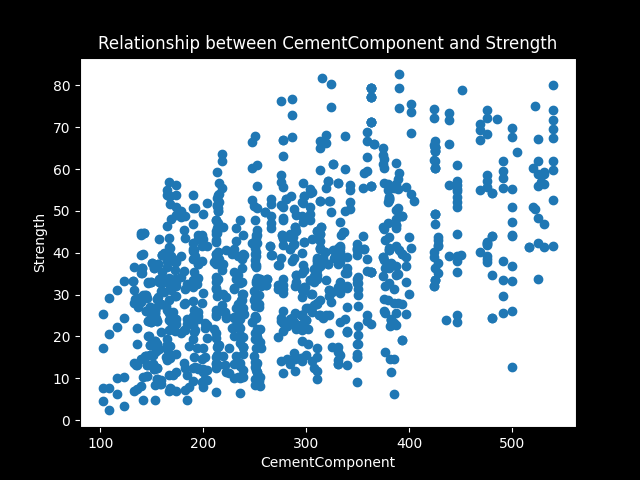

In [ ]:
Image(filename="/content/groupchat/Cement_vs_Strength_black.png")